# Naive Bayes Tutorial Part 1: Predicting survival from titanic crash

In [16]:
import pandas as pd

In [17]:
df = pd.read_csv('/kaggle/input/tianic-salaries/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'], axis = 'columns', inplace = True)
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [19]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

In [20]:
df['Age'] = df['Age'].fillna(df.Age.mean())
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   Fare      891 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 34.9+ KB


In [22]:
df['Sex'].replace({'male': 0, 'female': 1}, inplace= True)
df.head()

/tmp/ipykernel_33/202963731.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sex'].replace({'male': 0, 'female': 1}, inplace= True)
/tmp/ipykernel_33/202963731.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'].replace({'male': 0, 'female': 1}, inplace= True)


,Survived,Pclass,Sex,Age,Fare
0,0,3,0,22.0,7.2500
1,1,1,1,38.0,71.2833
2,1,3,1,26.0,7.9250
3,1,1,1,35.0,53.1000
4,0,3,0,35.0,8.0500


In [23]:
X = df.drop('Survived', axis = 'columns')
X.head()

,Pclass,Sex,Age,Fare
0,3,0,22.0,7.2500
1,1,1,38.0,71.2833
2,3,1,26.0,7.9250
3,1,1,35.0,53.1000
4,3,0,35.0,8.0500


In [24]:
y = df['Survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [29]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

age = sc.fit(X[['Age']])
X['Age'] = age.transform(X[['Age']])

fare = sc.fit(X[['Fare']])
X['Fare'] = fare.transform(X[['Fare']])

In [30]:
X.head()

,Pclass,Sex,Age,Fare
0,3,0,0.271174,0.014151
1,1,1,0.472229,0.139136
2,3,1,0.321438,0.015469
3,1,1,0.434531,0.103644
4,3,0,0.434531,0.015713


In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 124)

In [32]:
X_train.head()

,Pclass,Sex,Age,Fare
775,3,0,0.220910,0.015127
220,3,0,0.195778,0.015713
687,3,0,0.233476,0.019852
556,1,1,0.597889,0.077294
463,2,0,0.597889,0.025374


In [33]:
y_train.head()

775    0
220    1
687    0
556    1
463    0
Name: Survived, dtype: int64

In [34]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7430167597765364

In [36]:
y_predict = model.predict(X_test)
y_predict[:5]

array([1, 0, 0, 1, 1])

In [37]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_predict)
cm

array([[88, 22],
       [24, 45]])

In [40]:
cr = classification_report(y_test, y_predict)
print(cr)

              precision    recall  f1-score   support

           0       0.79      0.80      0.79       110
           1       0.67      0.65      0.66        69

    accuracy                           0.74       179
   macro avg       0.73      0.73      0.73       179
weighted avg       0.74      0.74      0.74       179



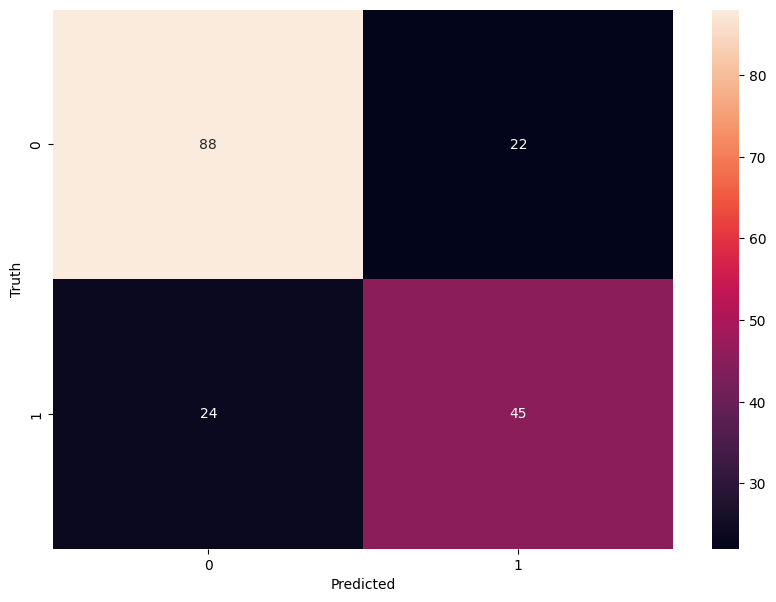

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

**Calculate the score using cross validation**


In [41]:
from sklearn.model_selection import cross_val_score

cross_val_score(GaussianNB(), X_train, y_train, cv= 5)

array([0.7972028 , 0.7972028 , 0.76760563, 0.77464789, 0.77464789])

# Exercise 

Use wine datasets from sklearn.datasets to classify wines into 3 categories. Load the dataset and split it into test and train. After that train the model using Gaussian and Multinominal classifier and post which model prefroms better. Use the trained model to perfom some prediction on test data 

In [42]:
from sklearn.datasets import load_wine

wine = load_wine()

In [43]:
dir(wine)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [45]:
df = pd.DataFrame(wine.data, columns = wine.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [46]:
df['target'] = wine.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [47]:
df['target'].value_counts()

target
1    71
0    59
2    48
Name: count, dtype: int64

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [49]:
X = df.drop('target', axis = 'columns')
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [50]:
y = df['target']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 124)

In [57]:
X_train[:5]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
104,12.51,1.73,1.98,20.5,85.0,2.20,1.92,0.32,1.48,2.94,1.04,3.57,672.0
108,12.22,1.29,1.94,19.0,92.0,2.36,2.04,0.39,2.08,2.70,0.86,3.02,312.0
147,12.87,4.61,2.48,21.5,86.0,1.70,0.65,0.47,0.86,7.65,0.54,1.86,625.0
157,12.45,3.03,2.64,27.0,97.0,1.90,0.58,0.63,1.14,7.50,0.67,1.73,880.0
33,13.76,1.53,2.70,19.5,132.0,2.95,2.74,0.50,1.35,5.40,1.25,3.00,1235.0


In [56]:
y_train[:5]

104    1
108    1
147    2
157    2
33     0
Name: target, dtype: int64

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

nai = GaussianNB()
nai.fit(X_train, y_train)
nai.score(X_test, y_test)

1.0

In [64]:
y_pre_nai = nai.predict(X_test)

In [60]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
tree.score(X_test, y_test)

0.9166666666666666

In [65]:
y_pre_tree = tree.predict(X_test)

In [62]:
import numpy as np

navi = cross_val_score(GaussianNB(), X_train, y_train, cv= 10)
np.average(navi)

0.9795238095238096

In [63]:
treess = cross_val_score(DecisionTreeClassifier(), X_train, y_train, cv= 10)
np.average(treess)

0.8804761904761905

In [67]:
from sklearn.metrics import confusion_matrix, classification_report

cm_nai = confusion_matrix(y_test, y_pre_nai)
print(cm_nai)

[[ 8  0  0]
 [ 0 18  0]
 [ 0  0 10]]


In [68]:
cm_tree = confusion_matrix(y_test, y_pre_tree)
print(cm_tree)

[[ 7  1  0]
 [ 1 17  0]
 [ 0  1  9]]


In [69]:
cl_navi = classification_report(y_test, y_pre_nai)
print(cl_navi)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [70]:
cl_tree = classification_report(y_test, y_pre_tree)
print(cl_tree)

              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.89      0.94      0.92        18
           2       1.00      0.90      0.95        10

    accuracy                           0.92        36
   macro avg       0.92      0.91      0.91        36
weighted avg       0.92      0.92      0.92        36



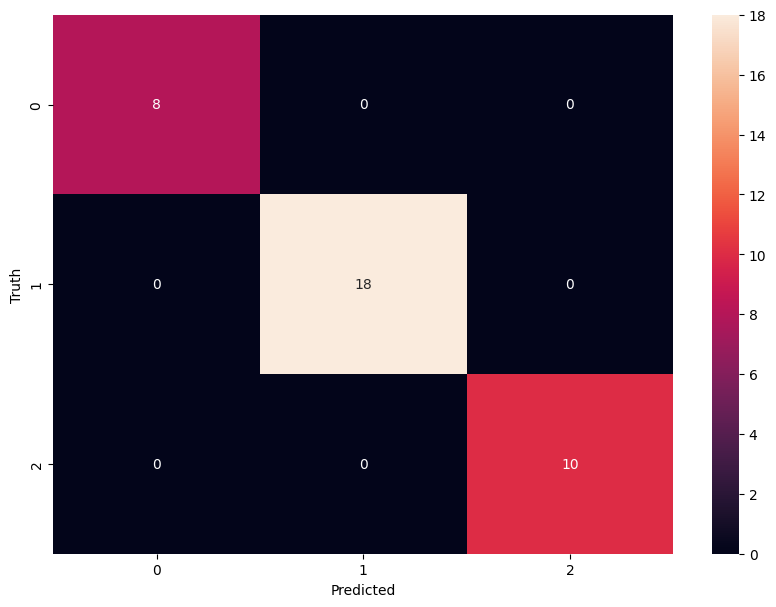

In [71]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 7))
sns.heatmap(cm_nai, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

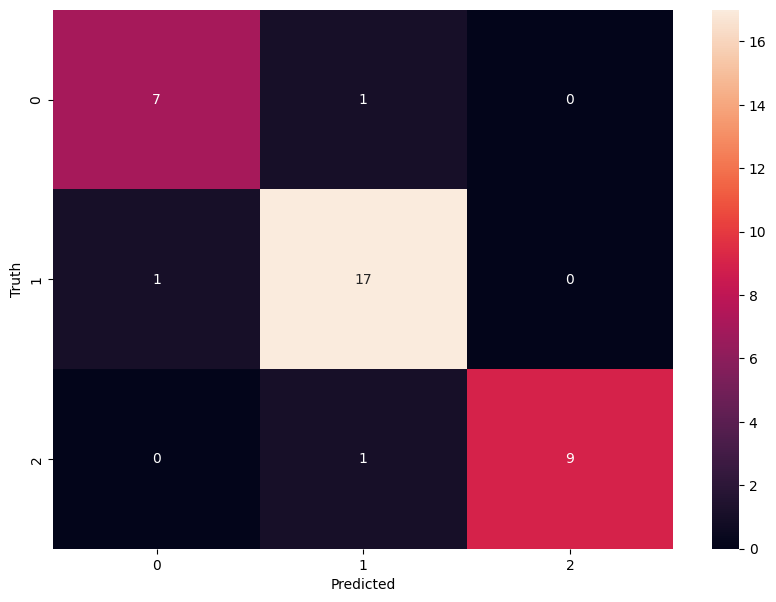

In [72]:
plt.figure(figsize = (10, 7))
sns.heatmap(cm_tree, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()